# 1 Jupyter Settings

In [1]:
# Jupyter Layout
import os
import sys
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# 2 Local Settings

Now define the files you want to compare:

In [2]:
# File names to compare
filename_A = '/Volumes/Data Drive/nwb_convert_tutorial/convert_test_rerun/nwb2/20080516_R1.nwb'
filename_B = '/Volumes/Data Drive/nwb_convert_tutorial/convert_test_rerun/nwb1.0.x/20080516_R1.nwb'
# Plot heading
heading_A = 'File A'
heading_B = 'File B'

Now we'll define plotting settings and the path the `nwb-schema/docs/utils` folder so that we can use the helper classes from there to compare the files 

In [3]:
nwb_schema_utils_dir =  os.path.dirname(os.path.abspath('.'))   # This must be the path to nwb-schema/docs. Assuming that we are using the notebook directly from withing the docs/utils folder of the nwb_schema repo the following will work: os.path.dirname(os.path.abspath('.')
mpl_interactive = False   # Use interactive inline SVG rendering for matplotlib

# Imports

In [4]:
try:
    sys.path.append(nwb_schema_utils_dir)
    from utils.render import NXGraphHierarchyDescription, HierarchyDescription
    if mpl_interactive:
        %matplotlib notebook
        %config InlineBackend.figure_format = 'svg'
        autostop_interact = True
    else:
        %matplotlib inline
    import matplotlib.pyplot as plt    
    VIS_AVAILABLE = True
except ImportError:
    VIS_AVAILABLE = False
    print('DISABLING VISUALIZATION OF FILE HIERARCHY')

# 1 Compare HDF5 files

In [5]:
if VIS_AVAILABLE:
    f1 = HierarchyDescription.from_hdf5(filename_A)
    f2 = HierarchyDescription.from_hdf5(filename_B)

    # Compare groups
    g1= set([i['name'] for i in f1['groups']])
    g2= set([i['name'] for i in f2['groups']])
    print("Groups in %s file not in %s file" % (heading_B, heading_A))
    for i in (g2-g1):
        print(i)
    print("")
    print("Groups in %s file not in %s file" % (heading_A, heading_B))
    for i in (g1-g2):
        print(i)    

    # Compare datasets    
    d1= set([i['name'] for i in f1['datasets']])
    d2= set([i['name'] for i in f2['datasets']])
    print("")
    print("Datasets in %s file not in %s file" % (heading_B, heading_A))
    for i in sorted(d2-d1):
        print(i)
    print("")
    print("Datasets in %s file not in %s file " % (heading_A, heading_B))
    for i in sorted(d1-d2):
        print(i)    

    # Compare attributes    
    a1= set([i['name'] for i in f1['attributes']])
    a2= set([i['name'] for i in f2['attributes']])
    # Omitted attributes refer to attributes on omitted datasets 
    print("")
    print("Attributes in %s file not in %s file" % (heading_B, heading_A))
    for i in sorted(a2-a1):
        print(i)
    print("")
    print("Attributes in %s file not in %s file" % (heading_A, heading_B))
    for i in sorted(a1-a2):
        print(i)

Groups in File B file not in File A file
/general/subject
/general/specifications

Groups in File A file not in File B file
/general/devices
/general/devices/----

Datasets in File B file not in File A file
/general/extracellular_ephys/61-channel_probe/device
/general/extracellular_ephys/electrode_group
/general/extracellular_ephys/electrode_map
/general/notes
/general/random_number_generation
/general/related_publications
/general/specifications/nwb_core.py
/general/subject/genotype
/general/subject/species
/processing/Cells/UnitTimes/cell_1/stim_1
/processing/Cells/UnitTimes/cell_1/stim_2
/processing/Cells/UnitTimes/cell_1/stim_3
/processing/Cells/UnitTimes/cell_2/stim_1
/processing/Cells/UnitTimes/cell_2/stim_2
/processing/Cells/UnitTimes/cell_2/stim_3
/processing/Cells/UnitTimes/cell_3/stim_1
/processing/Cells/UnitTimes/cell_3/stim_2
/processing/Cells/UnitTimes/cell_3/stim_3
/processing/Cells/UnitTimes/cell_4/stim_1
/processing/Cells/UnitTimes/cell_4/stim_2
/processing/Cells/UnitTi

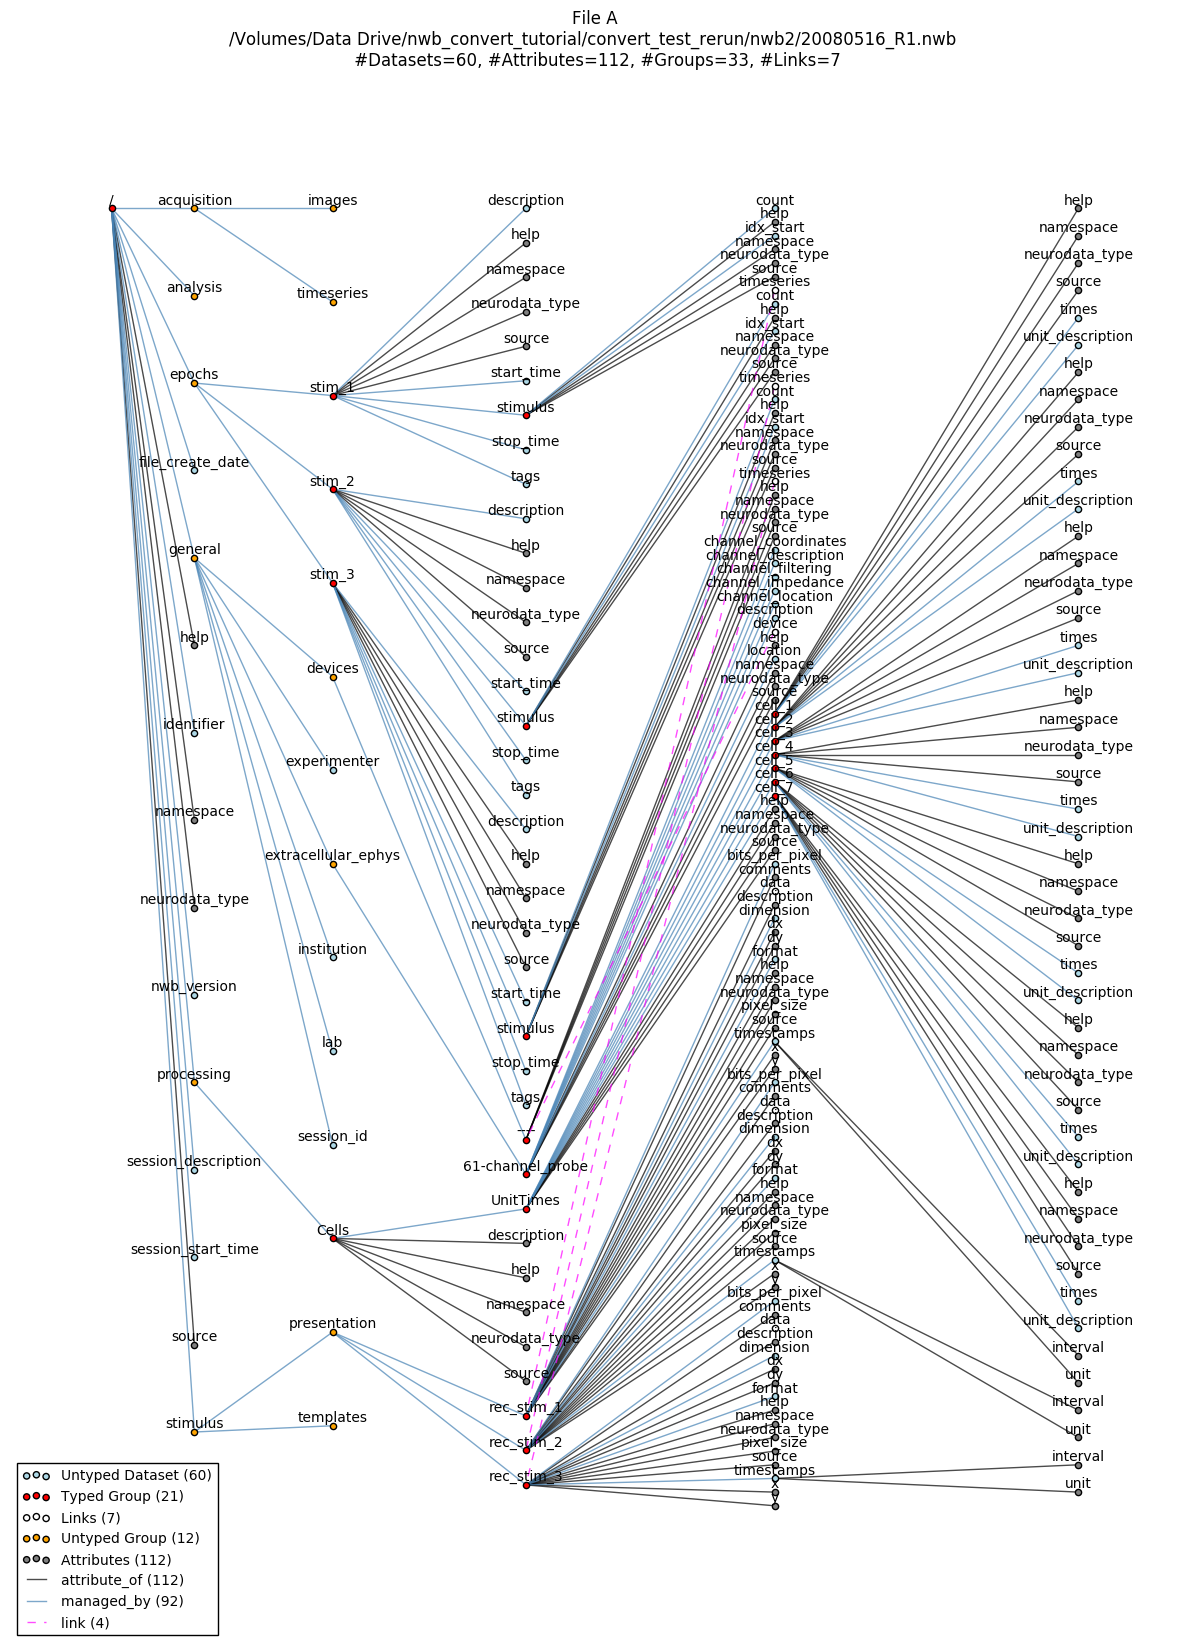

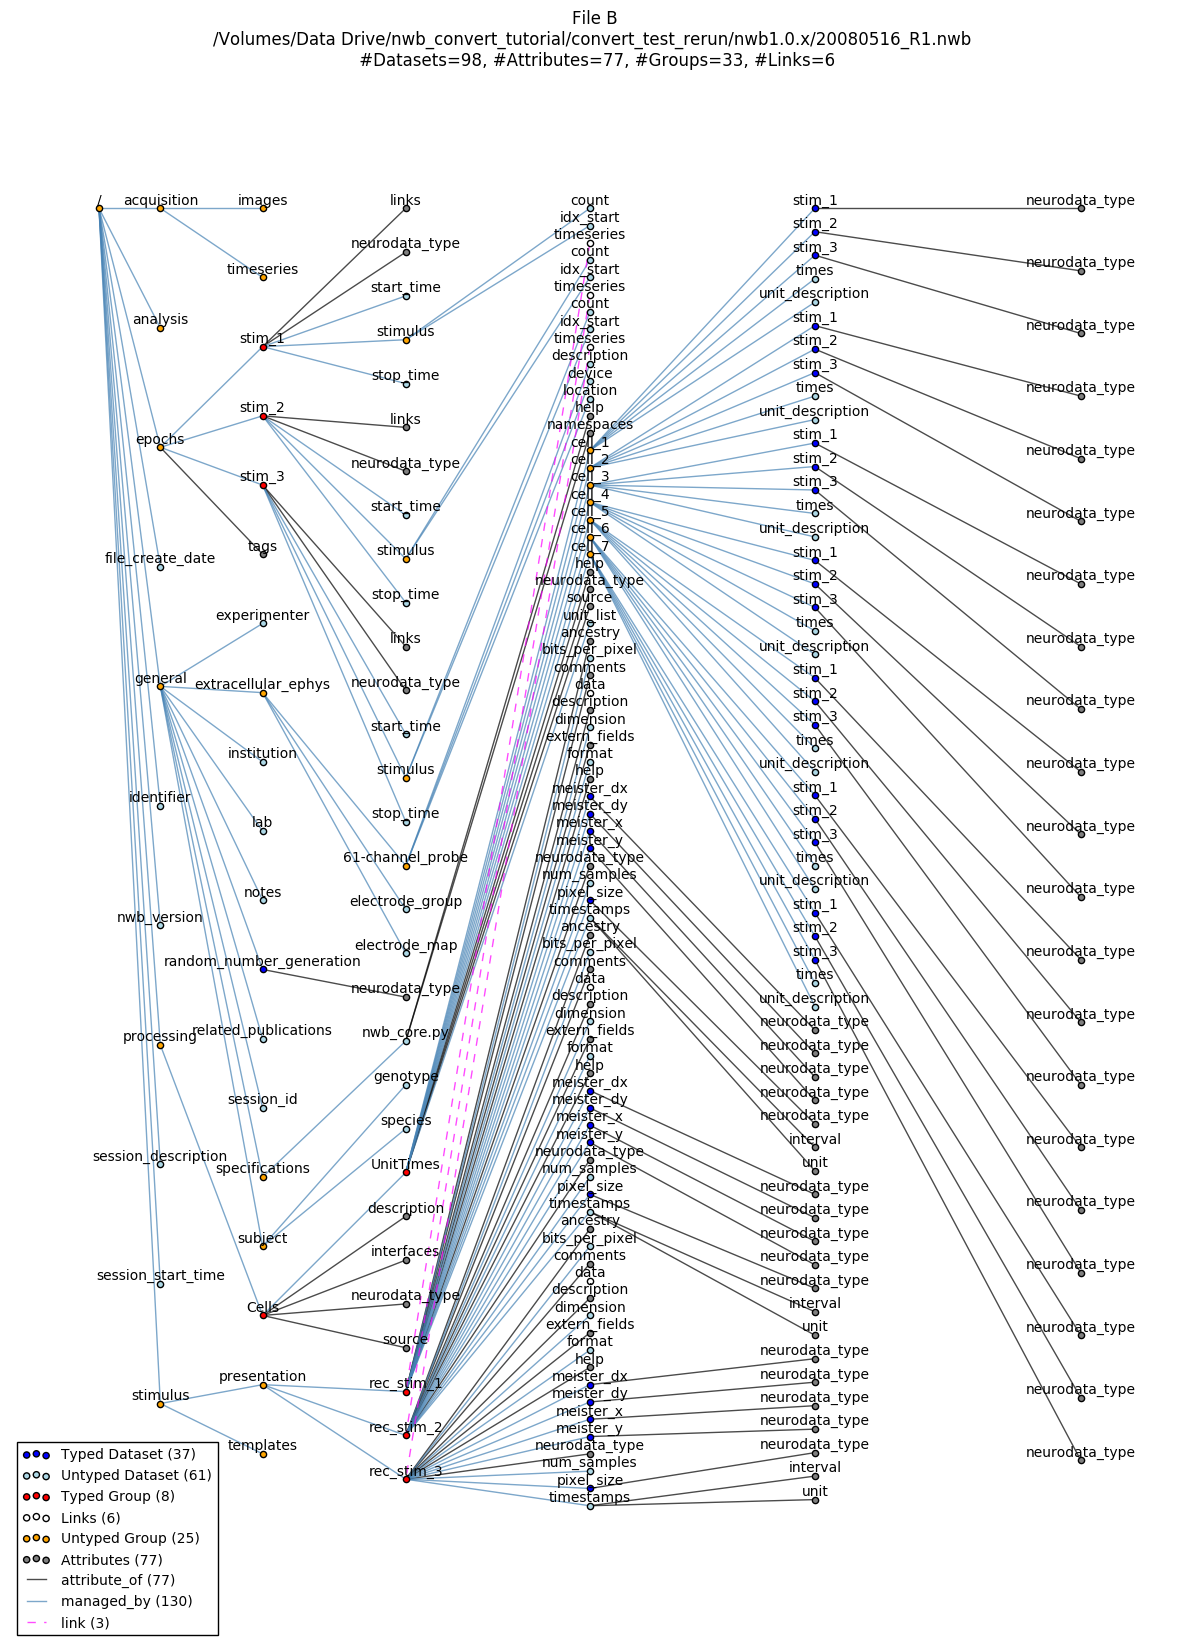

In [6]:
# Plot a select NWB 1.0.6 and a NWB 2.0 file
if VIS_AVAILABLE:
    filenames = [filename_A, filename_B]
    headings = ['File A', 'File B']
    for i, filename in enumerate(filenames):
        file_hierarchy = HierarchyDescription.from_hdf5(filename)  
        file_graph = NXGraphHierarchyDescription(file_hierarchy)          
        fig = file_graph.draw(show_plot=False,
                              figsize=(12,16),
                              label_offset=(0.0, 0.0065),
                              label_font_size=10)
        plot_title = headings[i] + "\n" + filename + " \n " + "#Datasets=%i, #Attributes=%i, #Groups=%i, #Links=%i" % (len(file_hierarchy['datasets']), len(file_hierarchy['attributes']), len(file_hierarchy['groups']), len(file_hierarchy['links']))
        plt.title(plot_title)
        plt.show()